# Loan Prediction

## Problem 

A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are __Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History__ and others. The requirements are as follows:

<html>
<body>

<ol>
  <li>Check eligibility of the Customer given the inputs described above.</li>
  <li>Identify customer segments from given data and categorize customer into one of the segments.</li>
  <li>If customer is not eligible for the input required amount and duration:</li>
    <ol>
      <li>what can be amount for the given duration.</li>
      <li>if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?</li>
    </ol> 
</ol>  

</body>
</html>

## Data

- Variable Descriptions:

| Variable          	| Description                                    	|
|-------------------	|------------------------------------------------	|
| Loan_ID           	| Unique Loan ID                                 	|
| Gender            	| Male/ Female                                   	|
| Married           	| Applicant married (Y/N)                        	|
| Dependents        	| Number of dependents                           	|
| Education         	| Applicant Education (Graduate/ Under Graduate) 	|
| Self_Employed     	| Self employed (Y/N)                            	|
| ApplicantIncome   	| Applicant income                               	|
| CoapplicantIncome 	| Coapplicant income                             	|
| LoanAmount        	| Loan amount in thousands                       	|
| Loan_Amount_Term  	| Term of loan in months                         	|
| Credit_History    	| credit history meets guidelines                	|
| Property_Area     	| Urban/ Semi Urban/ Rural                       	|
| Loan_Status       	| Loan approved (Y/N)                            	|

## For data description I have used Loan Prediction Problem available on "datahack.analyticsvidhya".
The link is: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

In [202]:
# Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Reading the training dataset
df_train = pd.read_csv("train.csv")

# Reading the test dataset
test = pd.read_csv("test.csv")

In [203]:
print(df_train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [204]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis

In [205]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [206]:
# the info() will give the data type of all the columns of data frame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


* The Gender, Married, Dependents, Education, Self_Employed , Property_Area are categorical data so, we will check that the different categories of these columns. To get the total data count based on differnt categories we will use values_count()

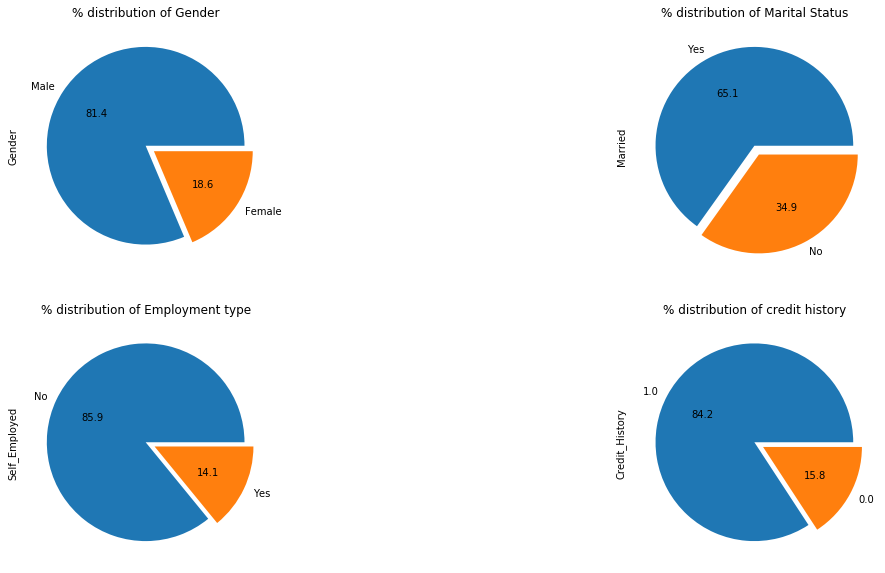

In [207]:
plt.figure(1)
plt.subplot(221)
df_train['Gender'].value_counts().plot.pie(title='% distribution of Gender',figsize=(20,10),autopct="%1.1f",explode=[0,.1])
# train_df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
df_train['Married'].value_counts().plot.pie(title='% distribution of Marital Status',autopct="%1.1f",explode=[0,.1])

plt.subplot(223)
df_train['Self_Employed'].value_counts().plot.pie(title='% distribution of Employment type',autopct="%1.1f",explode=[0,.1])

plt.subplot(224)
df_train['Credit_History'].value_counts().plot.pie(title='% distribution of credit history',autopct="%1.1f",explode=[0,.1])
plt.show()


In [208]:
#Get the unique values and their frequency of variable Gender
df_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [209]:
#Get the unique values and their frequency of variable Married
df_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [210]:
#Get the unique values and their frequency of variable Dependent
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [211]:
#Get the unique values and their frequency of variable Education
df_train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [212]:
#Get the unique values and their frequency of variable Self_Employed
df_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [213]:
# Get the unique values and their frequency of variable Property_Area
df_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [214]:
# Get the unique values and their frequency of variable Loan_status
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Data preprocessing

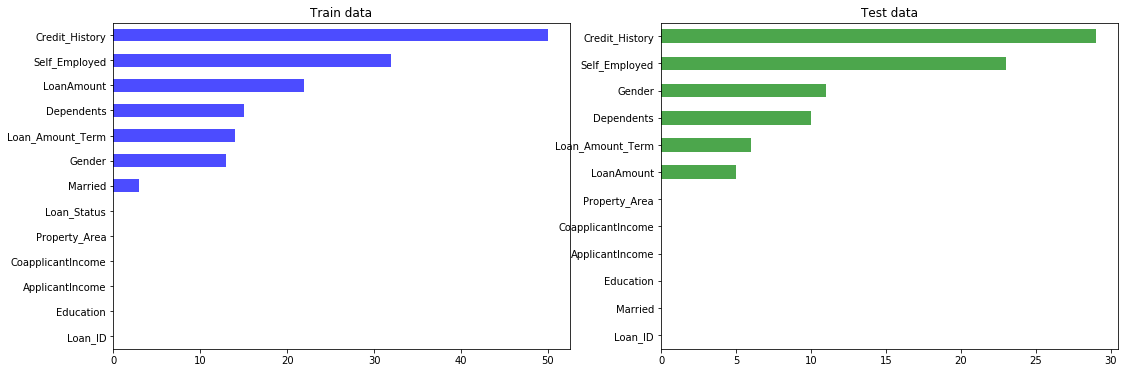

In [215]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
df_train.isna().sum().sort_values().plot.barh(color='blue',alpha=0.7)
plt.title('Train data')
plt.subplot(1,2,2)
test.isna().sum().sort_values().plot.barh(color='green',alpha=0.7)
plt.title('Test data')
plt.show()

In [216]:
# Before doing preprocessing let's find out the null values in dataframe
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender - 13, Married - 3, Dependents - 15, Self_Employed - 32, Credit_History - 50 are object or categorical data </br>
LoanAmount - 22, Loan_Amount_Term - 14 are numerical data.

We will update the __numerical null values__ with their respective column __mean__ values and the __categorical__ type with their __mode__ value 

In [217]:
#Imputing Missing values with mean for continuous variable
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean(), inplace=True)

In [218]:
# Impute missing values for Gender
df_train['Gender'].fillna(df_train['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
df_train['Married'].fillna(df_train['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0],inplace=True)


### We will check the dependency of ''Loan_Status on categorical data, for this will use pandas crosstab(Compute a simple cross tabulation of two (or more) factors)
for credit history 1 means a good credit history,

In [219]:
df_train.groupby('Credit_History')['Credit_History'].agg('count')

Credit_History
0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [220]:
# Credit History and Loan Status
pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [221]:
# person having good credit history has way to better record for loan approval
print("Credit_History No %.2f" % (7/89))
print("Credit_History Yes %.2f" % (378/475))

Credit_History No 0.08
Credit_History Yes 0.80


In [222]:
# create a copy of train dataset to explore credit history. 
df_train_ch = df_train.copy()

In [223]:
# Impute missing values for Credit_History
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0],inplace=True)

In [224]:
# Credit History and Loan Status
pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


In [225]:
# person having good credit history has way to better record for loan approval
print("Credit_History No %.2f" % (7/89))
print("Credit_History Yes %.2f" % (415/525))

Credit_History No 0.08
Credit_History Yes 0.79


### After looking into all the colums seperately, I have found that credit hisotry have the most impact on loan approval,
we will drop all the rows having null value present in credit_history column and try to find any difference 

In [226]:
# we will drop all the rows having null value present in credit_history column
df_train_ch.dropna(subset=['Credit_History'], inplace=True)

In [227]:
df_train_ch.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

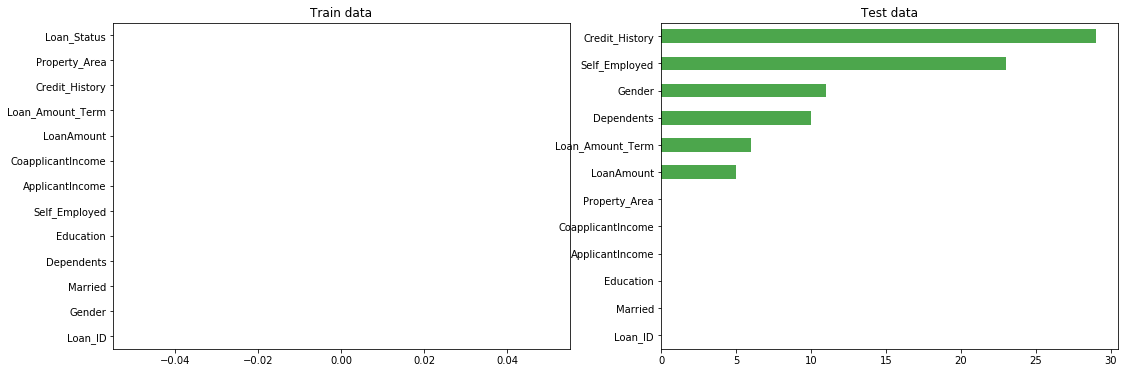

In [228]:
# Let's check for null values in the Train Test data, at this point I have not processed the null values in test data
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
df_train.isna().sum().sort_values().plot.barh(color='blue',alpha=0.7)
plt.title('Train data')
plt.subplot(1,2,2)
test.isna().sum().sort_values().plot.barh(color='green',alpha=0.7)
plt.title('Test data')
plt.show()

In [229]:
# Credit History and Loan Status
pd.crosstab(df_train_ch['Credit_History'], df_train_ch['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [230]:
print("Credit_History No %.2f" % (7/89))
print("Credit_History Yes %.2f" % (378/475))

Credit_History No 0.08
Credit_History Yes 0.80


### __After dropping the null values also we can't see any changes in relation between credit history and loan approval__

In [231]:
# Gender and Loan Status
pd.crosstab(df_train['Gender'], df_train['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


In [232]:
print("female %.2f" % (75/112))
print("male %.2f" % (347/502))
## male and female are all most equal for approved loans

female 0.67
male 0.69


In [233]:
# Married and Loan Status
pd.crosstab(df_train['Married'], df_train['Loan_Status'], margins=True)
#Married person has more approved loan as compared to non-married

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,288,401
All,192,422,614


In [234]:
print("Married %.2f" % (288/401))
print("Un-married %.2f" % (134/213))

Married 0.72
Un-married 0.63


In [235]:
# Dependents and Loan Status
pd.crosstab(df_train['Dependents'], df_train['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Dependents,,,
0,113,247,360
1,36,66,102
2,25,76,101
3+,18,33,51
All,192,422,614


In [236]:
# person having 2 dependent has more approved loan as rest
print("0 dependent %.2f" % (247/360))
print("1 dependent %.2f" % (66/102))
print("2 dependent %.2f" % (76/101))
print("3+ dependent %.2f" % (33/51))

0 dependent 0.69
1 dependent 0.65
2 dependent 0.75
3+ dependent 0.65


In [237]:
# Self_Employed and Loan Status
pd.crosstab(df_train['Self_Employed'], df_train['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Self_Employed,,,
No,166,366,532
Yes,26,56,82
All,192,422,614


In [238]:
print("Self_Employed yes %.2f" % (56/82))
print("Self_Employed no %.2f" % (366/532))

Self_Employed yes 0.68
Self_Employed no 0.69


In [239]:
# Property_Area and Loan Status
pd.crosstab(df_train['Property_Area'], df_train['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


In [240]:
# semiurban person have more approved loan as compared to Rural and Urban
print("Rural %.2f" % (110/179))
print("semiurban %.2f" % (179/233))
print("Urban %.2f" % (133/202))

Rural 0.61
semiurban 0.77
Urban 0.66


In [241]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<html>
<body>

<ol>
  <li>Credit History with No having loan approval rate of 8% and Credit_History Yes have loan approval rate of 80%</li>
  <li>As Credit History is the most important data point for this model it I have drop all the null values but I have also checked that without dropping the null values also the relation do not chnage.</li>
  <li>Male and Female have all most equal approved loans percentage 69 and 67% respectively</li>
  <li>Married person has more approved loan rate(72%) as compared to non-married(63%).</li>
  <li>Person having 2 dependent has more approved loan rate(75%) than as rest</li>
  
</ol>  

</body>
</html>

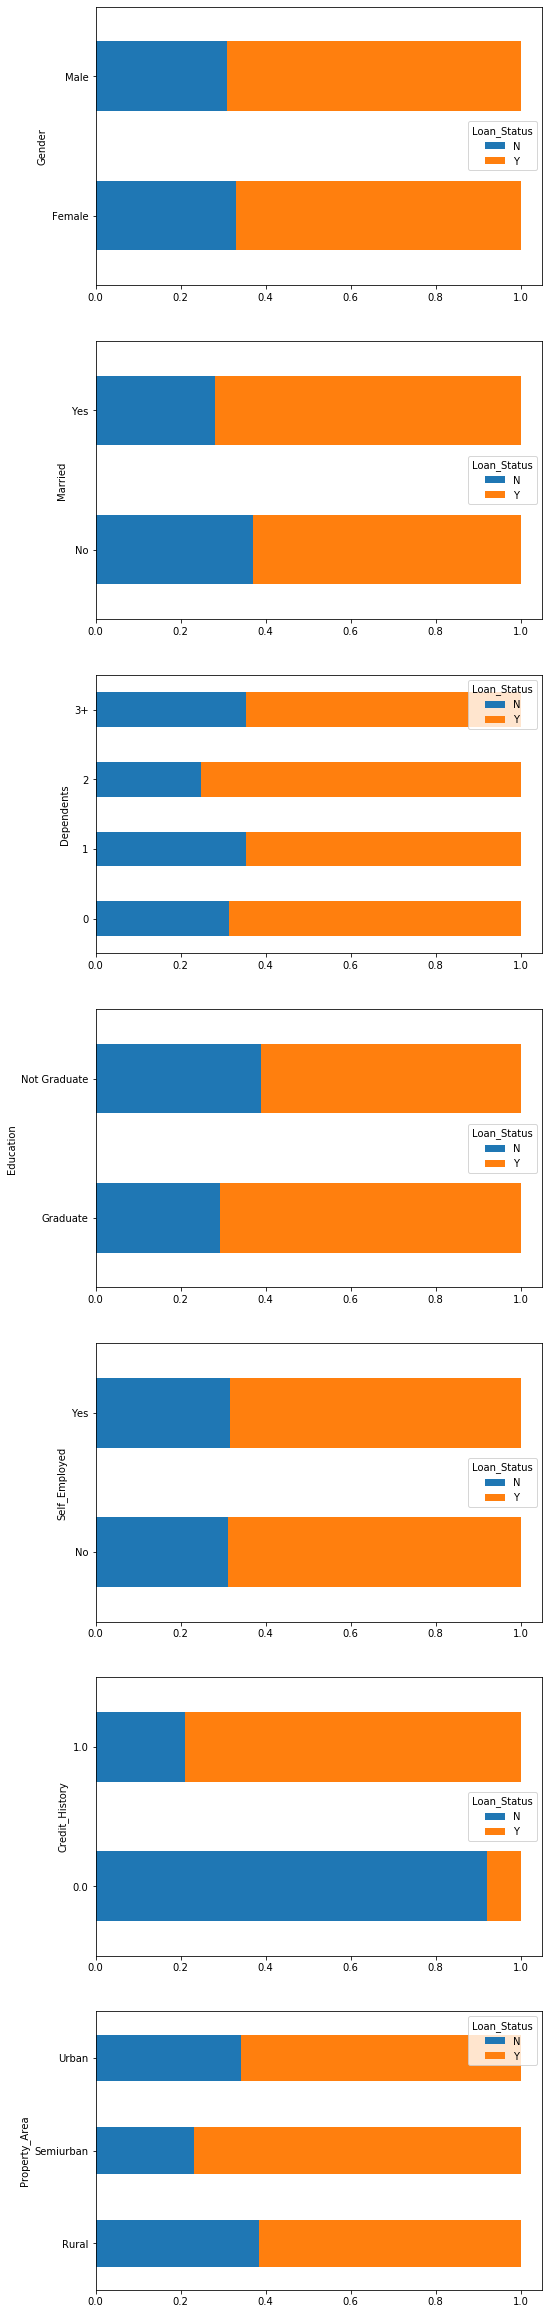

In [242]:
cat_columns = ['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area' ]
n_cat_cols = len(cat_columns)

fig,ax = plt.subplots(n_cat_cols,1,figsize=(8,6*n_cat_cols))
for i,col in enumerate(cat_columns):
    # Create a cross table for stacked graph
    pd.crosstab(df_train[col],df_train['Loan_Status'])
    ct = pd.crosstab(df_train[col],df_train['Loan_Status'],normalize="index")
    ct.plot.barh(stacked=True,ax=ax[i])
    
plt.show()

In [243]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [244]:
# Convert all non-numeric values to number
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

for var in cat:
    le = preprocessing.LabelEncoder()
    df_train[var]=le.fit_transform(df_train[var].astype('str'))
df_train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status           object
dtype: object

In [245]:
print("df_train['Property_Area']")
print(df_train['Property_Area'].value_counts())
print("df_train['Self_Employed']")
print(df_train['Self_Employed'].value_counts())
print("df_train['Education']")
print(df_train['Education'].value_counts())
print("df_train['Dependents']")
print(df_train['Dependents'].value_counts())
print("df_train['Married']")
print(df_train['Married'].value_counts())
print("df_train['Gender']")
print(df_train['Gender'].value_counts())

df_train['Property_Area']
1    233
2    202
0    179
Name: Property_Area, dtype: int64
df_train['Self_Employed']
0    532
1     82
Name: Self_Employed, dtype: int64
df_train['Education']
0    480
1    134
Name: Education, dtype: int64
df_train['Dependents']
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
df_train['Married']
1    401
0    213
Name: Married, dtype: int64
df_train['Gender']
1    502
0    112
Name: Gender, dtype: int64


In [246]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,Y


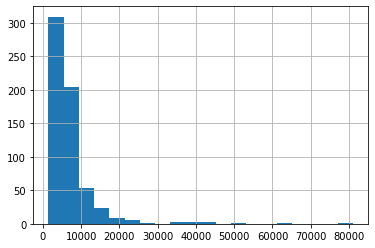

In [247]:
# Add the ApplicantIncome and CoapplicantIncome to TotalIncome
df_train['TotalIncome'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
df_train['TotalIncome'].hist(bins=20)

* log transformation is a commonly used technique to reduce the variability of data when the data distribution is highly skewed

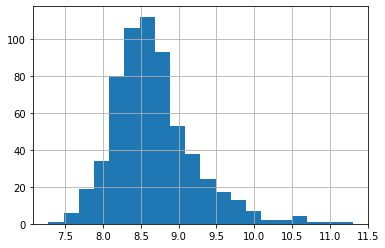

In [248]:
# Perform log transformation of TotalIncome to make it closer to normal
df_train['TotalIncome_log'] = np.log(df_train['TotalIncome'])

# Looking at the distribtion of TotalIncome_log
df_train['TotalIncome_log'].hist(bins=20)

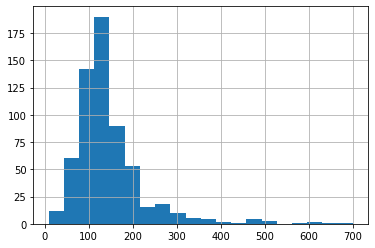

In [249]:
# Looking at the distribtion of LoanAmount
df_train['LoanAmount'].hist(bins=20)

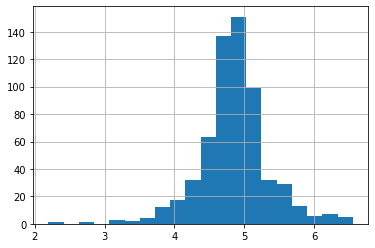

In [250]:
# Perform log transformation of LoanAmount to make it closer to normal
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'])

# Looking at the distribtion of LoanAmount_log
df_train['LoanAmount_log'].hist(bins=20)

In [251]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
TotalIncome_log      0
LoanAmount_log       0
dtype: int64

In [252]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [253]:
# transform the test data:

# Add the ApplicantIncome and CoapplicantIncome to TotalIncome
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
# Perform log transformation of TotalIncome to make it closer to normal
test['TotalIncome_log'] = np.log(test['TotalIncome'])
# Perform log transformation of LoanAmount to make it closer to normal
test['LoanAmount_log'] = np.log(test['LoanAmount'])


# Model Building

In [254]:
#Combining both train and test dataset so that we can preprocess the test data 

#Create a flag for Train and Test Data set
df_train['Type']='Train' 
test['Type']='Test'
fullData = pd.concat([df_train,test], axis=0, sort=True)

#Look at the available missing values in the dataset
fullData.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        29
Dependents            10
Education              0
Gender                11
LoanAmount             5
LoanAmount_log         5
Loan_Amount_Term       6
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         23
TotalIncome            0
TotalIncome_log        0
Type                   0
dtype: int64

In [255]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 17 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       952 non-null float64
Dependents           971 non-null object
Education            981 non-null object
Gender               970 non-null object
LoanAmount           976 non-null float64
LoanAmount_log       976 non-null float64
Loan_Amount_Term     975 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              981 non-null object
Property_Area        981 non-null object
Self_Employed        958 non-null object
TotalIncome          981 non-null float64
TotalIncome_log      981 non-null float64
Type                 981 non-null object
dtypes: float64(7), int64(1), object(9)
memory usage: 138.0+ KB


In [256]:
#Identify categorical and continuous variables
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

In [257]:
#Imputing Missing values with mean for continuous variable
fullData['LoanAmount'].fillna(fullData['LoanAmount'].mean(), inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mean(), inplace=True)
fullData['LoanAmount_log'].fillna(fullData['LoanAmount_log'].mean(), inplace=True)
fullData['ApplicantIncome'].fillna(fullData['ApplicantIncome'].mean(), inplace=True)
fullData['CoapplicantIncome'].fillna(fullData['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
fullData['Gender'].fillna(fullData['Gender'].mode()[0], inplace=True)
fullData['Married'].fillna(fullData['Married'].mode()[0], inplace=True)
fullData['Dependents'].fillna(fullData['Dependents'].mode()[0], inplace=True)
fullData['Self_Employed'].fillna(fullData['Self_Employed'].mode()[0],inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mode()[0], inplace=True)
fullData['Credit_History'].fillna(fullData['Credit_History'].mode()[0], inplace=True)

In [258]:
fullData.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
LoanAmount_log         0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
TotalIncome            0
TotalIncome_log        0
Type                   0
dtype: int64

In [259]:
fullData['Type'].value_counts()

Train    614
Test     367
Name: Type, dtype: int64

In [260]:
#create label encoders for categorical features
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

train_modified=fullData[fullData['Type']=='Train']
test_modified=fullData[fullData['Type']=='Test']
# drop the 
train_modified["Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))

/home/raman/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [261]:
test_modified.shape

(367, 17)

In [262]:
print(train_modified.shape)
print(test_modified.shape)

(614, 17)
(367, 17)


In [263]:
test_modified.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,LoanAmount_log,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,TotalIncome,TotalIncome_log,Type
0,5720,0.0,1,0,2,3,110.0,4.700480,360.0,LP001015,NaN,3,5,2,5720.0,8.651724,Test
1,3076,1500.0,1,1,2,3,126.0,4.836282,360.0,LP001022,NaN,3,5,2,4576.0,8.428581,Test
2,5000,1800.0,1,2,2,3,208.0,5.337538,360.0,LP001031,NaN,3,5,2,6800.0,8.824678,Test
3,2340,2546.0,1,2,2,3,100.0,4.605170,360.0,LP001035,NaN,3,5,2,4886.0,8.494129,Test
4,3276,0.0,1,0,3,3,78.0,4.356709,360.0,LP001051,NaN,2,5,2,3276.0,8.094378,Test


In [264]:
train_modified.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'Education', 'Gender', 'LoanAmount', 'LoanAmount_log',
       'Loan_Amount_Term', 'Loan_ID', 'Loan_Status', 'Married',
       'Property_Area', 'Self_Employed', 'TotalIncome', 'TotalIncome_log',
       'Type'],
      dtype='object')

In [265]:
cols = ['Credit_History', 'Dependents','Education', 'LoanAmount_log', 'Loan_Amount_Term', 
        'Married', 'Property_Area', 'Self_Employed','TotalIncome_log']

## Logistic Regression Model:

#### Logistic Regression with differnt features

In [266]:
# let’s make a model with ‘Credit_History’, 'Education' & 'Gender'
from sklearn.linear_model import LogisticRegression


predictors_Logistic= ['Credit_History', 'Education','Gender']

X_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["Loan_Status"].values

X_test=test_modified[list(predictors_Logistic)].values

# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

#Predict Output
#predicted= model.predict(X_test)

# model evaluation
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")

array([0.80645161, 0.82258065, 0.77419355, 0.75806452, 0.78688525,
       0.78688525, 0.86885246, 0.85245902, 0.80327869, 0.83606557])

## Create a Generic Classification Function for prediction, testing the model

In [267]:
#Import models from scikit learn module:
from sklearn import metrics
from sklearn.model_selection import KFold

#Generic function for making a classification model and accessing performance:

def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=10)
    error = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

In [268]:
from sklearn.linear_model import LogisticRegression


predictors_Logistic= ['Credit_History', 'LoanAmount_log','Loan_Amount_Term', 'TotalIncome_log','Property_Area']

x_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["Loan_Status"].values

x_test=test_modified[list(predictors_Logistic)].values

# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(x_train, y_train)

#Predict Output
predicted= model.predict(x_test)

#Reverse encoding for predicted outcome
predicted = number.inverse_transform(predicted)

#Store it to test dataset
outcome_var = 'Loan_Status'

classification_model(model, df_train, predictors_Logistic,outcome_var)



/home/raman/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/raman/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

Accuracy : 80.945%


/home/raman/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/raman/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

Cross-Validation Score : 80.960%


/home/raman/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [269]:
#test_modified.to_csv("Logistic_Prediction.csv",columns=['Loan_ID','Loan_Status'])
predicted

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [270]:
# Craete result data frame to store it as prediction.csv file
# drop all the columns that we have added in test data
test_modified.drop(['Loan_Status', 'Type', 'LoanAmount_log', 'TotalIncome_log', 'TotalIncome'], axis = 1, inplace=True)

# create a test dataframe with predicted values for test.csv 
res = pd.DataFrame(data=predicted[:],    # values
             index=None,   
             columns=['Loan_Status'])

# concatenate the test_modified and res dataframe
result = pd.concat([test_modified,res], axis=1, sort=True)

/home/raman/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [271]:
result.to_csv("Logistic_Prediction.csv",columns=['Loan_ID','Loan_Status'], index = False)

### Conclusion 

### 1.> Check eligibility of the Customer given the inputs described above
Based on the model we can conclude that loan approval is based on credit history. 

### 2.> Identify customer segments from given data and categorize customer into one of the segments.

In [284]:
result['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

### 3.> If customer is not eligible for the input required amount and duration:

In [285]:
loan_status_no = result[result['Loan_Status']=='N']
loan_status_no[['LoanAmount', 'Loan_Amount_Term']]

,LoanAmount,Loan_Amount_Term
7,147.000000,360.000000
13,166.000000,360.000000
25,148.000000,360.000000
35,176.000000,360.000000
55,130.000000,360.000000
58,176.000000,360.000000
63,108.000000,360.000000
66,135.000000,360.000000
67,130.000000,360.000000
69,188.000000,360.000000


In [287]:
loan_status_no[loan_status_no['Loan_Amount_Term'] <= 240.000000].head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Married,Property_Area,Self_Employed,Loan_Status
84,4456,0.0,0,0,2,3,131.0,180.0,LP001450,3,4,2,N
173,3017,2845.0,0,0,2,3,159.0,180.0,LP001979,2,5,2,N
245,3186,3145.0,0,0,2,1,150.0,180.0,LP002355,3,4,2,N
325,2875,2416.0,0,0,2,3,95.0,6.0,LP002802,2,4,2,N
354,5316,187.0,0,4,3,3,158.0,180.0,LP002921,3,4,2,N
